<a href="https://colab.research.google.com/github/PhatHuynhTranSon99/Neural-Network-From-Scratch/blob/main/NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Network from stratch

## About
Neural Networks are often blackboxes some abitrary inputs to your desired output (whether it's a continuous value or a categorical value). In this colab, I hope to uncover to essential details on how to implement common layers in a standard feed-forward neural network.

## Task
The task we have at hand is that of classification, where the neural network is required to accurately predict the class of a 2-dimensional datapoints. The dataset used for this example will be generated from 2-spiral dataset. To do this, we make use of several layers, namely:


*   Fully-connected layer
*   Sigmoid layer





## Library import

For this example, we will use only numpy to generate the dataset and train the neural network. We will also use matplotlib to plot the values

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Data Generation

This little script generates a random 2-d spiral dataset using numpy

In [ ]:
N = 400     #Number of datapoints
pi = np.pi  # 3.14
theta = np.sqrt(np.random.rand(N))*2*pi

# Generate the positive points
r_a = 2*theta + pi
data_a = np.array([np.cos(theta)*r_a, np.sin(theta)*r_a]).T
positive_points = data_a + np.random.randn(N,2)

# Generate the negative points
r_b = -2*theta - pi
data_b = np.array([np.cos(theta)*r_b, np.sin(theta)*r_b]).T
negative_points = data_b + np.random.randn(N,2)

# Combine x and y (the labels: 0 or 1)
negative_data = np.append(negative_points, np.zeros((N,1)), axis=1)
positive_data = np.append(positive_points, np.ones((N,1)), axis=1)

# Combine positive points and negative points to create a dataset
data = np.append(negative_data, positive_data, axis=0)
np.random.shuffle(data) # Shuffle the data in abitrary order

The dataset generated's plot is as follows:

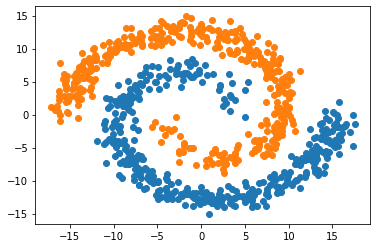

In [ ]:
plt.scatter(positive_points[:,0], positive_points[:,1])
plt.scatter(negative_points[:,0], negative_points[:,1])
plt.show()

## Defining the layers

In this section, we define two layers (Fully connected and sigmoid) with forward and backward function

### Full-connected layer

This layer consists of a multiplication of the input with the weight matrix W and addition with the bias b

In [ ]:
class FullyConnected:
  def __init__(self, m, n):
    """
    Params:
      - m: the number of rows of weight matrix W
      - n: the number of columns of weight matrix W
    Puspose:
      - To initialize the weight matrix W (dimension m x n) and 
        a vector bias b
      - Weight matrix W is initialized with random uniform weights (to avoid the problem of symmetry)
      - Bias vector b is initialize with zeros
    """
    self.W = np.random.rand(m, n)
    self.b = np.zeros(m)

  def forward(self, x):
    """
    Params:
      - x: input of dimension k x m
    Purpose:
      - Perform a forward pass (output = Wx + b)
      - Cache the input value (x) for backward step
    """
    self.x = x
    return self.W @ x + self.b

  def backward(self, dL, learning_rate = 0.01):
    """
    Params:
      - dL: propagated loss from deeper layer (dL/dz with z: the value of forward pass)
    Purpose:
      - Find the loss gradient with respect to W, b and x i.e to produce dL/dW and dL/db and dX
      - Update W and b for gradient descent
      - Define the upstream gradient dX (for shallower layers)
    """

    # Produce the gradient
    dW = np.outer(dL, self.x)
    dX = dL @ self.W
    db = dL

    # Perform gradient descent
    self.W -= learning_rate * dW
    self.b -= learning_rate * db

    # Returns the upstream gradient dX
    return dX

### Test fully-connected layer

In this part, we check if the forward and background pass of the implementation produce vectors and matrices of correct shapes

In [ ]:
# Define an input of size 3 x 2
x = np.random.rand(3)

# Define a fully connecte layer of size (2 x 4) (m = 2 and n = 4)
fully_connected = FullyConnected(4, 3)

# Get output for forward pass and backward pass (with random loss graidne tfor backward pass)
forward_output = fully_connected.forward(x)
backward_output = fully_connected.backward( np.random.rand(4) )

# Check the dimensions
assert forward_output.shape == (4,)
assert backward_output.shape == (3,)

As one may observe, the forwad and background produce vectors and matrices of correct shape

### Sigmoid layer

This section will define the Sigmoid layer, together with its forward and backward methods

In [ ]:
class Sigmoid:
  def sigmoid(self, x):
    """
    Params:
      - x: Input vector (with dimension n x 1)
    Purpose:
      - Calculate the sigmoid for each entry of the input vector x
    """
    return 1 / (1 + np.exp(-x))

  def forward(self, x):
    """
    Params:
      - x: Input vector (with dimension n x 1)
    Purpose:
      - Calculate the forward step of the input vector x i.e produce a vector of size (n x 1) also
      - Cache the value of input vector x (for the backward step)
    """
    self.x = x
    return self.sigmoid(x)

  def backward(self, dL):
    """
    Params:
      - dL: Propagated loss from deeper layers
    Purpose:
      - Calculate the backward step of the input vector x i.e produce a vector of size (n x 1) also
      - Return the gradient as upstream gradient for shallower layers
      - Don't perform any kind of gradient descent (this layer doesn't have any parameters)
    """
    df = self.sigmoid(self.x) * ( 1 - self.sigmoid(self.x) )
    dX = dL * df # dL/dx = dL/df x df/dX
    return dX

### Test sigmoid layer

In this part, we check if the forward and background pass of the implementation produce vectors and matrices of correct shapes

In [ ]:
# Define an input of size 3 x 2
x = np.random.rand(3)

# Define a fully connecte layer of size (2 x 4) (m = 2 and n = 4)
sigmoid = Sigmoid()

# Get output for forward pass and backward pass (with random loss graidne tfor backward pass)
forward_output = sigmoid.forward(x)
backward_output = sigmoid.backward( np.random.rand(3) )

# Check the dimensions
assert forward_output.shape == (3,)
assert backward_output.shape == (3,)

## Define the loss layer

This section will define a class for calculate cross entropy loss for a single prediction y_hat and y. It will have 2 method, one for calculating loss and another for calculating the gradient of the loss with respect to the prediction y_hat

In [ ]:
class CrossEntropy:
  def forward(self, y, y_hat):
    """
    Params:
      - y: The true value of the label (for one example (x_i, y_i))
      - y_hat:  The predicted value of the label (for one example (x_i, y_i)).
        This is produced by our learning algorithm
    Purpose:
      - To cache the value of y and y_hat (for back propagation step)
      - To calculate the cross entropy loss of one learning example (x_i, y_i)
      - To return the cross entropy loss
    """
    self.y = y
    self.y_hat = y_hat
    return - y * np.log(y_hat) - (1 - y) * np.log(1 - y_hat)

  def backward(self):
    """
    Params:
      - None
    Purpose:
      - To calculate the cross entropy loss's gradient of one learning example 
        (x_i, y_i) with respect to the prediction (y_hat) dL / dy_hat
      - To return the cross entropy loss's gradient
    """
    y = self.y
    y_hat = self.y_hat

    return (y_hat - y) / (y_hat * (1 - y_hat))

## Test the loss layer

This section will test the cross enptropy loss layer's result (by checking the dimesions)

In [ ]:
# Define one example true and predicted label
y = 1
y_predicted = 0.8

# Create cross entropy layer
cross_entropy = CrossEntropy()

# Calculate the forward and backward pass
forward_result = cross_entropy.forward(y, y_hat = y_predicted)
backward_result = cross_entropy.backward()

## Define Neural Network implementation

In this section, we define the basics of Neural Network class. This implementation will have no layers initially and it's up the the users to add in the layers. Its only reponsibility is calling the classes' forward and backward methods to perform training

In [ ]:
class NeuralNetwork:
  def __init__(self, loss, learning_rate = 0.001):
    """
    Params:
      - loss: The loss layer used for calculating the loss function for one
        training example
      - learning_rate: The learning rate (alpha) of the neural network
        which is used for gradient descent
    Purpose:
      - To set the loss for the neural network
      - To initialize the layers array of the neural network
      - To set the learning rate of the neural network
    """
    self.learning_rate = learning_rate
    self.loss = loss
    self.layers = []

  def add(self, layer):
    """
    Params:
      - layer: A layer of the neural network, this can be any of the 
        FullyConnected or Sigmoid layer above. You can extend this to more
        layers by defining your own and adding forward and backward 
        methods
    Purpose:
      - To add a layer to the neural network. This layer will be saved in the
        self.layers property
    """
    self.layers.append(layer)

  def forward(self, x, y):
    """
    Params:
      - x: The input vector to neural network (vector of dimension p)
    Purpose:
      - To calculate the loss of the network (for one example) 
        using each layer's own propagation method and the loss function
      - To return the loss to the caller
    """

    # Calculate the result of the last layer
    result = x
    for layer in self.layers:
      result = layer.forward(result)

    # Calculate the loss of the prediction
    loss = self.loss.forward(y, y_hat = result)

    return result, loss

  def backward(self):
    """
    Params:
      - None
    Purpose:
      - To perform an iteration of backpropagation of the input by calling each
        layer's backward method
      - To return the gradient with respect to the input x
    """
    
    # First initialize the initial loss gradient 
    # (w.r.t last layer of the network)
    dL = self.loss.backward()

    # Then propagate the loss to shallower layers
    for layer in self.layers[::-1]:
      dL = layer.backward(dL)

    # Return the gradient w.r.t to the input (callers can optionally use this)
    # result
    return dL
  
  def train(self, training_data, max_iterations=10):
    """
    Params:
      - training_data: the training dataset containing all training examples
        x_i and y_i
      - max_iterations: the number of iterations to go through the entire
        dataset and training
    Purpose:
      - To train the neural network by using the forward and backward methods
      - To calculate the average loss of the dataset after each iteration
      - To display the training loss after 10 iterations
    """

    # Get the dimensions of training data (i.e the number of training dataset)
    m = training_data.shape[0]

    # Train the network max_iterations times
    for iteration in range(max_iterations):
      # First shuffle the training example so that the training is truly 
      # stochastic
      np.random.shuffle

      # We also save a cummulated loss to later calculate the average loss of
      # the current iteration
      cummulated_loss = 0

      # For each iteration, we go through every datapoint (single x_i and y_i)
      # to train
      for training_example in training_data:
        # We need to extract the x_i and y_i from the training_example as they
        # were coupled together (y is the final element in the training_example)
        # array
        x_i = training_example[:-1]
        y_i = training_example[-1]

        # Run the forward propagation method on this example to calculate the 
        # loss. We use np.squezze and unwrapping syntax to make the loss a 
        # scalar
        training_example_loss = self.forward(x_i, y_i)[1][0]

        # Add to cummulated loss 
        cummulated_loss += training_example_loss

        # Now we run backprop on this example to actually training the network
        self.backward()

      # After all examples have been looked at, finally the average loss is
      # calculated and display to the caller after each 100 iterations (m is the 
      # number of training 
      # example)
      if iteration % 100 == 0:
        average_loss = cummulated_loss / m
        print(f"Average loss for iteration { iteration } is {average_loss}");
    
  def predict(self, x):
    """
    Params: 
     - x: the feature (a matrix of size m x n - #examples x #dimensions)
    Purpose:
     - To generate the prediction based on the input matrix x
     - To return the vector y_hat (vector of size (m,))
    """

    # First we run self.forward for each example x_i and get the prediction
    # (first element of the tuple result is the prediction). This is another 
    # array so we just need to grap the first element by using[0]. Then use list
    # comprehension to put the prediction into an array and finally use np.array
    # to convert the array into a numpy vector
    return np.array([ self.forward(x_i, 0)[0][0] for x_i in x])

### Test the Neural Network implementation

This section will test the forward and backward method of the Neural Network (with all the layers and loss defined above). A random training example will be used for this purpose

In [ ]:
# Define a random training example (x and y)
x = np.random.rand(2)
y = 1

# Create a neural network (with one hidden layer)
# and cross entropy loss with random learning rate
network = NeuralNetwork(loss = CrossEntropy(), learning_rate=0.001)

# Add hidden layer
network.add(FullyConnected(3, 2))
network.add(Sigmoid())

# Add output layer
network.add(FullyConnected(1, 3))
network.add(Sigmoid())

# Test the forward and backward result
forward_output = network.forward(x, y)
backward_output = network.backward()

## Test the network with the spiral dataset

Here we finally get to test the train method implemeted in the NeuralNetwork class on the spiral dataset created above.

In [ ]:
# Create neural network with cross entropy loss and random learning rate
neural_network = NeuralNetwork(loss = CrossEntropy(), learning_rate=0.001)

# Add hidden layer
neural_network.add(FullyConnected(3, 2))
neural_network.add(Sigmoid())

# Add output layer
neural_network.add(FullyConnected(1, 3))
neural_network.add(Sigmoid())

# Train the network by call train method and providing training data
neural_network.train(data, max_iterations=1000)

Average loss for iteration 0 is 0.6654598394261038
Average loss for iteration 100 is 0.24886155727137574
Average loss for iteration 200 is 0.20229297292268086
Average loss for iteration 300 is 0.19550567025863136
Average loss for iteration 400 is 0.19235686164884036
Average loss for iteration 500 is 0.19078045331299034
Average loss for iteration 600 is 0.1897202824269937
Average loss for iteration 700 is 0.1888497820604258
Average loss for iteration 800 is 0.1880385601388058
Average loss for iteration 900 is 0.18734461683741693


Now we can check the accuracy rate of the neural network on the training set by calling neural_network.predict() and compare it to the true result

In [ ]:
# Split data into x (features) and y (label)
x = data[:, :-1]
y = data[:, -1]

# Now use the predict method of the neural network to generate the prediction
probabilities = neural_network.predict(x)

# Convert to y_hat (by comparing to 0.5)
y_hat = probabilities >= 0.5

# Calculate the number of correct examples (by comparing y and y_hat and
# summing)
correct_examples = np.sum(y_hat == y)

# Calculate the accuracy (by dividing witht the total number of training 
# examples)
total_examples = y.shape[0]
prediction_accuracy = correct_examples / total_examples
print(f"The accuracy for the training set is { prediction_accuracy }")

The accuracy for the training set is 0.93
